In [1]:
import numpy as np

# 손글씨 숫자 분류 학습 신경망 예제
- 흑백 손글씨 숫자 이미지(28x28)픽셀의 이미지가 10개 범주로 이루어진 데이터
- 넘파이 형식으로 저장되어 있음
<hr>
$$
Sample Dataset
$$

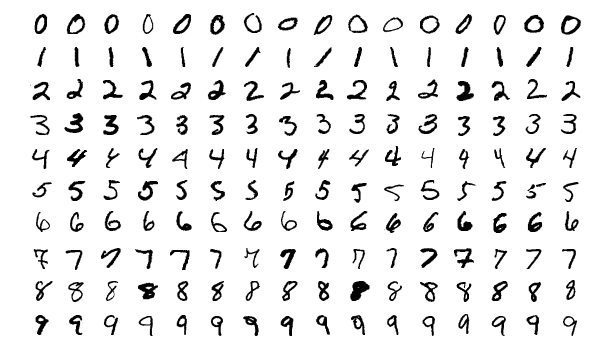

# MNIST 데이터셋 케라스에서 불러오기

In [2]:
from tensorflow.keras.datasets import mnist
(train_img,train_labels),(test_img,test_labels)=mnist.load_data()

## Train Data(약 85%)

In [3]:
len(train_img)

60000

In [4]:
train_img.shape

(60000, 28, 28)

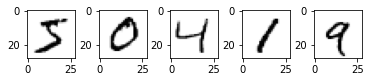

In [5]:
import matplotlib.pyplot as plt
# 샘플 이미지 출력
fig,axs=plt.subplots(1,5)
for i in range(5):
    axs[i].imshow(train_img[i], cmap='Greys')
    plt.subplots_adjust(wspace=0.5)


In [6]:
# Target 값
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Test Data(약 15%)

In [7]:
len(test_img)

10000

In [8]:
test_img.shape

(10000, 28, 28)

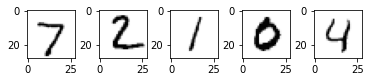

In [9]:
import matplotlib.pyplot as plt
# 샘플 이미지 출력
fig,axs=plt.subplots(1,5)
for i in range(5):
    axs[i].imshow(test_img[i], cmap='Greys')
    plt.subplots_adjust(wspace=0.5)


In [10]:
# Target 값
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 신경망 예측 예제 진행
#### 활성화 함수
 $$
 Relu 함수
 $$
 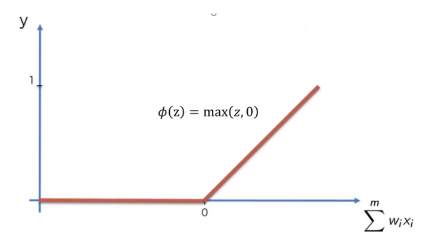
- 입력이 양수면 x값 음수일 때는 0을 출력함
- 경사하강에 영향을 주지 않아 다른 활성화 함수에 비해 학습이 빠름.
- 주로 은닉층에 쓰임.
- 음수의 값을 입력받으면 항상 0이기 때문에 훈련성능이 떨어진다는 단점 존재
<hr>
$$
SoftMax 함수
$$

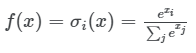

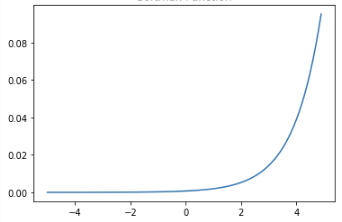
- 입력값을 0~1사이에서 출력되도록 정규화하여 출력값의 합이 1이 되는 특성을 가짐
- 출력노드의 활성화 함수로 주로 쓰임
- 다중 클래스 분류에서 출력층에 사용

## 신경망 구조 생성

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# 층이 2개인 신경망
model = keras.Sequential([
    layers.Dense(512,activation='relu'),
    layers.Dense(10,activation='softmax')
])

## 신경망 컴파일 단계
**1. optimizer** : 성능을 향상시키기 위해 입력된 데이터를 기반으로 모델을 업데이트하는 매커니즘(역전파 알고리즘 구현)
   - rmsprop : 값이 무한히 커지는 단점을 해결하기 위해서 지수 이동평균을 이용해 가중치로 영향력을 줄여줌<br>    

**2. loss** : 예측값과 타겟값의 차이를 점수로 계산하는 함수, 모델의 성능을 측정하는 방법
   - categorical_crossentropy : 예측에 사용된 범주의 수가 2개 이상일 때 사용(softmax함수)<br>
    
**3. metrics** : Train과 Test의 성능을 확인하는 지표(ex. 정확도)
   - accuracy : 모델성능 지표를 정확도로 설정

In [13]:
model.compile(optimizer='rmsprop', 
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')

### 이미지 데이터 재배열

In [15]:
train_imgs=train_img.reshape((60000,28*28))
train_imgs=train_imgs.astype('float32')/255
test_imgs=test_img.reshape((10000,28*28))
test_imgs=test_imgs.astype('float32')/255

In [16]:
print(train_imgs.shape,test_imgs.shape)

(60000, 784) (10000, 784)


### 모델 훈련

In [17]:
model.fit(train_imgs,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2590 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1045 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0687 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0504 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0374 - accuracy: 0.9886


### 모델을 사용하여 예측 만들기

In [19]:
test_sample=test_imgs[0:100]
pred=model.predict(test_sample)
pred

4/4 [==============================] - 0s 3ms/step


array([[8.23804314e-09, 1.23699606e-10, 3.08996596e-06, 1.85406168e-06,
        2.58717266e-12, 1.54700852e-09, 5.73401961e-15, 9.99994993e-01,
        4.59527305e-09, 2.91970377e-08],
       [5.85525683e-10, 5.38453719e-07, 9.99999404e-01, 2.83386168e-08,
        1.66554445e-19, 1.69210512e-08, 8.44882220e-11, 2.44598895e-17,
        1.08720863e-08, 1.28271189e-16],
       [6.89146802e-08, 9.99378204e-01, 1.47659361e-04, 9.57049360e-06,
        3.40475890e-05, 4.11659084e-06, 6.50992433e-06, 2.56516534e-04,
        1.62805562e-04, 4.97923963e-07],
       [9.99993682e-01, 1.92809076e-14, 1.19106835e-06, 7.76099895e-09,
        1.66649770e-08, 8.83104505e-08, 1.11429745e-06, 3.69481563e-06,
        6.08659900e-10, 2.19114966e-07],
       [2.71638373e-06, 6.96191715e-12, 1.29093269e-06, 5.30077138e-09,
        9.99760449e-01, 1.50279718e-08, 1.13731835e-06, 5.82945131e-06,
        5.72369515e-07, 2.28067438e-04],
       [1.84639670e-09, 9.99259651e-01, 1.78710854e-06, 9.71467330e-07,
   

In [48]:
pred[0].argmax()

7

In [47]:
pred[0][7]

0.999995

In [39]:
# 테스트 데이터의 0번째 이미지가 숫자 7일 확률 = 약 99.9%
for i in range(10):
    print(pred[0][i])

8.238043e-09
1.236996e-10
3.089966e-06
1.8540617e-06
2.5871727e-12
1.5470085e-09
5.7340196e-15
0.999995
4.595273e-09
2.9197038e-08


In [33]:
# 해당 숫자와 예측값이 일치
test_labels[0]

7

## Test data 모델 평가
Train Data loss: 0.0374 - accuracy: 0.9886<br>
Test Data loss: 0.0638 - accuracy: 0.9821<br>
**Train과 Test에서의 성능 차이가 거의 없어 과적합이 생기지 않은 것으로 보임**

In [49]:
loss,accuracy=model.evaluate(test_imgs,test_labels)
print('손실점수 : {}, 정확도 : {}'.format(loss,accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0638 - accuracy: 0.9821
손실점수 : 0.06384368240833282, 정확도 : 0.9821000099182129
